In [1]:
# 模型下载链接：https://github.com/cosanlab/py-feat/releases/tag/v0.1，需要手动下载该网址里的所有文件，并放入site-packages/feat/resources当中
from feat import Detector


e:\Python37\Machine_learning\lib\site-packages\nilearn\__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()


### 初始化检测器

In [2]:
detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
)


检测器的模型信息呈现

In [3]:
detector

feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

### 导入示例的人脸照片

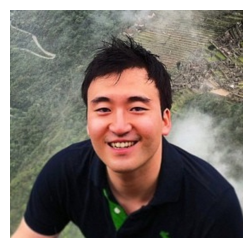

In [5]:
from feat.utils.io import get_test_data_path
from feat.plotting import imshow
import os

# Helper to point to the test data folder
test_data_dir = get_test_data_path()

# Get the full path
single_face_img_path = os.path.join(test_data_dir, "single_face.jpg")

# Plot it
imshow(single_face_img_path)

### 进行面部AU检测，并对6种基本情绪进行预测

In [6]:
single_face_prediction = detector.detect_image(single_face_img_path)

# Show results
single_face_prediction

100%|██████████| 1/1 [00:03<00:00,  3.43s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,192.561653,140.51018,179.37261,259.210003,0.999708,186.658541,187.411818,189.165048,193.472243,202.410428,...,0.277524,0.000495,0.000025,0.001946,0.990421,0.000028,0.007057,0.000029,e:\Python37\Machine_learning\lib\site-packages...,0


### 输出面部AU及情绪的分析，和人脸的识别点标记

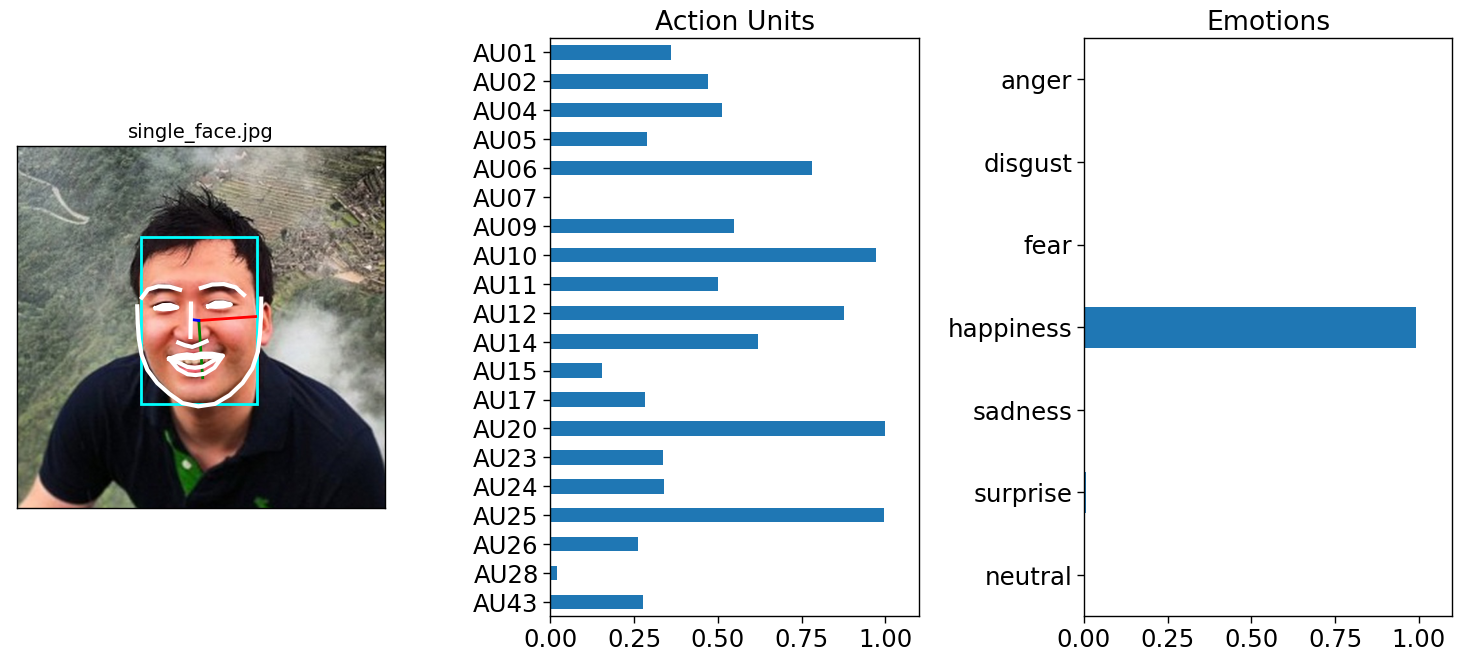

In [7]:
figs = single_face_prediction.plot_detections(poses=True)

### 抽象成mask

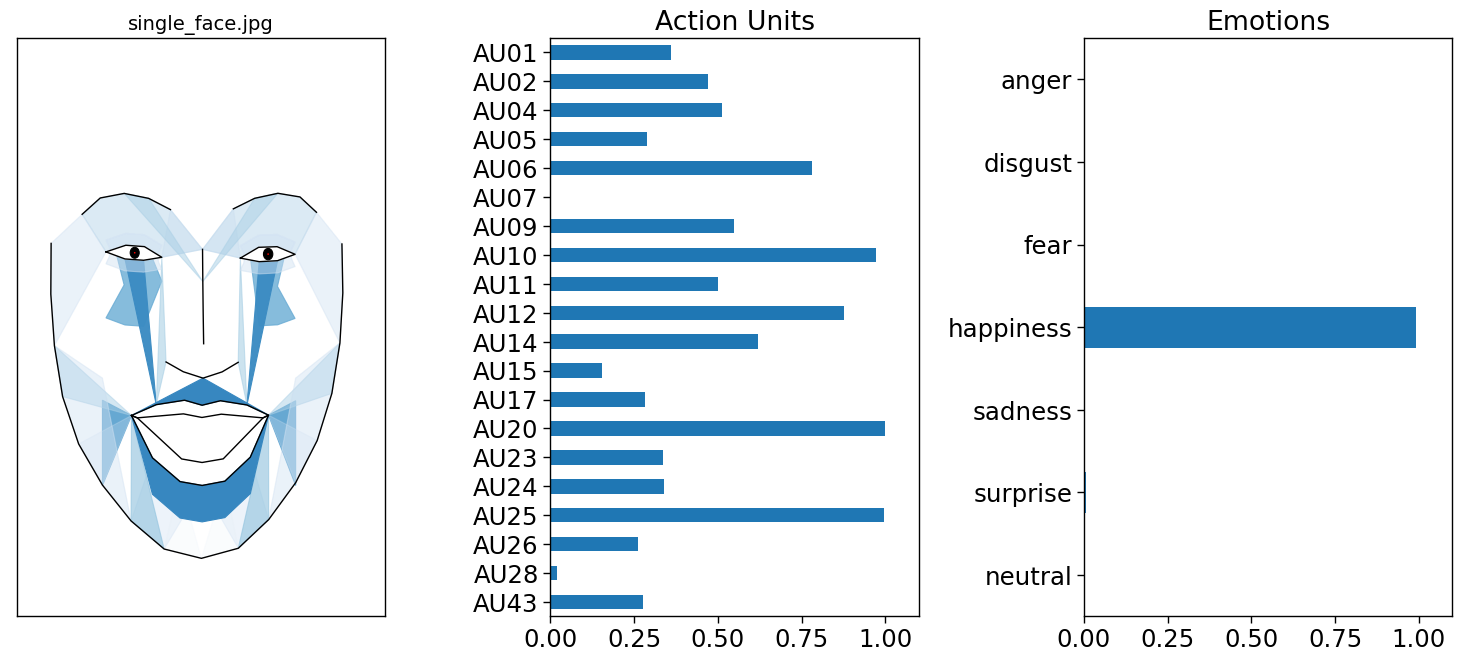

In [8]:
figs = single_face_prediction.plot_detections(faces='aus', muscles=True)